 Email spam classification 

In [4]:
import os
path =os.listdir("/Users/kirtimanrai/HW3/email-data/ham")
c=0
d=0
for file in path:
    c+=1
path1 =os.listdir("/Users/kirtimanrai/HW3/email-data/spam")

for files in path1:
    d+=1   
print("Number of spam mails is",d)
print("Number of ham mails is",c)#your code here

Number of spam mails is 3671
Number of ham mails is 1500


In [6]:
import re
import string
import codecs

def make_word_list(path):
    
    with codecs.open(path, "r", encoding='utf-8', errors='ignore') as f:
        corpus_text = f.read()

    for c in string.punctuation:
        corpus_text = corpus_text.replace(c, "")  # -- (1)
    
    text = re.sub(r'\S*\d\S*','',corpus_text) # -- (2)
    text = re.sub(r'[^\w\s]','',text)         # -- (3)
    
    text = text.lower().split()           # -- (4)         
    
    li = []
    for token in text:
        li.append(token)

    return " ".join(li)

In [14]:
import glob
import numpy as np
spamd = []
hamd=[]
data=[]
for f in glob.glob('/Users/kirtimanrai/HW3/email-data/spam/*.txt'):
    spamd.append(make_word_list(f))
    #data.append([make_word_list(f),1])


for f in glob.glob('/Users/kirtimanrai/HW3/email-data/ham/*.txt'):
    #data.append([make_word_list(f),0])
    hamd.append(make_word_list(f))
data=spamd+hamd
label=[]
for i in spamd:
    label.append(1)
for i in hamd:
    label.append(0)
#print(label[5170])   
#label[5170]
#label_h[1499]
#print(data[5170])
#print(hamd[-1])
#print(train_e[-1])
#print(hamd[-1])
#your code here

#print(hamd[-1])
#print(spamd[-1])
data=np.array(data) 
labels=np.array(label)
#data[:,0]
#your code here

In [15]:
vocab_size = 1000
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.8,
                                min_df=50,
                                stop_words='english',
                                max_features=vocab_size)
X = tf_vectorizer.fit_transform(data)

X=X.toarray()

l2=list(tf_vectorizer.vocabulary_.keys())
print("Number of unique words in the vocabulary is:"+str(len(l2)))
#labels.shape
#print(labels.shape)
#labels=labels.reshape((5171,1000))
#print(type(X))
#X.shape
#your code here
print(X)
#your code here

Number of unique words in the vocabulary is:1000
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 2 0]]


In [17]:
#KNN Hyperparameter tuning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
#f1=sklearn.metrics.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='weighted', sample_weight=None, zero_division='warn')
num_folds = 5
k_fold = KFold(num_folds)
#hyperparameter_settings = []  # fill this with hyperparameter settings that you want to try

#best_hyperparam_setting = None
best_cross_val_score = -np.inf  # assumes that a higher score is better
#for hyperparam_setting in hyperparameter_settings:
fold_scores = []
for k in 2**np.arange(0, 8):
    for i,j in k_fold.split(X):
        X_train, X_test = X[i], X[j]
        y_train, y_test = labels[i], labels[j]
        classifier=KNeighborsClassifier(n_neighbors=k)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        a = f1_score(y_test, y_pred,average='weighted')
        fold_scores.append(a)

        
    cross_val_score = np.mean(fold_scores)
    print('k:', k, 'cross validation score:', cross_val_score)

    
    # your code to train and score the training data here
    
    
    if cross_val_score > best_cross_val_score:  # assumes that a higher score is better
        best_cross_val_score = cross_val_score
        #best_hyperparam_setting = hyperparam_setting
print('Best k:', k, 'best cross validation score:', best_cross_val_score)
#print('Best hyperparameter setting:', best_hyperparam_setting)


k: 1 cross validation score: 0.9393391323526235
k: 2 cross validation score: 0.9392892556132162
k: 4 cross validation score: 0.9345245867037745
k: 8 cross validation score: 0.9271525695406488
k: 16 cross validation score: 0.9176631553488083
k: 32 cross validation score: 0.9058095736302904
k: 64 cross validation score: 0.8941182027224899
k: 128 cross validation score: 0.8827260560149982
Best k: 128 best cross validation score: 0.9393391323526235


In [ ]:
from sklearn.model_selection import KFold

num_folds = 5
k_fold = KFold(num_folds)
hyperparameter_settings = []  # fill this with hyperparameter settings that you want to try

best_hyperparam_setting = None
best_cross_val_score = -np.inf  # assumes that a higher score is better
for hyperparam_setting in hyperparameter_settings:
    fold_scores = []
    # your code to train and score the training data here
    
    cross_val_score = np.mean(fold_scores)
    if cross_val_score > best_cross_val_score:  # assumes that a higher score is better
        best_cross_val_score = cross_val_score
        best_hyperparam_setting = hyperparam_setting

print('Best hyperparameter setting:', best_hyperparam_setting)

In [18]:
#RF Hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
num_folds = 5
k_fold = KFold(num_folds)
hyperparameter_settings = [(max_features, min_samples_leaf)
                           for max_features in [50,200,600]
                           for min_samples_leaf in [1, 2, 4, 8, 16]]
  # fill this with hyperparameter settings that you want to try

best_hyperparam_setting = None
best_cross_val_score = -np.inf  # assumes that a higher score is better
for hyperparam_setting in hyperparameter_settings:
    max_features, min_samples_leaf = hyperparam_setting
    fold_scores = []
    # your code to train and score the training data here
    for i,j in k_fold.split(X):
        X_train, X_test = X[i], X[j]
        y_train, y_test = labels[i], labels[j]
        classifier=RandomForestClassifier(max_features=max_features,
                                            min_samples_leaf=min_samples_leaf,
                                            random_state=0)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        a = f1_score(y_test, y_pred,average='weighted')
        fold_scores.append(a)

        
    cross_val_score = np.mean(fold_scores)
   

    
    #cross_val_score = np.mean(fold_scores)
    if cross_val_score > best_cross_val_score:  # assumes that a higher score is better
        best_cross_val_score = cross_val_score
        best_hyperparam_setting = hyperparam_setting

print('Best hyperparameter setting:', best_hyperparam_setting,'cross validation score:',best_cross_val_score)

Best hyperparameter setting: (50, 1) cross validation score: 0.9836289109926957


In [24]:
from sklearn.metrics import average_precision_score, precision_recall_curve
import glob
test_data=[]
for f in glob.glob('/Users/kirtimanrai/HW3/email-data/testing/*.txt'):
    test_data.append(make_word_list(f))
path='/Users/kirtimanrai/HW3/email-data/testing/'
s=[]
ytrue=[]
names=[]
for file_name in os.listdir(path):
    #cnt+=1
    s = file_name.split(".")
    #print(s)
    names.append(s[3])
    if(s[3]=="spam"):
        ytrue.append(1)
    else:
        ytrue.append(0)
test_data=np.array(test_data) 
ytrue=np.array(ytrue)



vocab_size = 1000
from sklearn.feature_extraction.text import CountVectorizer
tf = CountVectorizer(max_df=0.9,
                                min_df=1,
                                stop_words='english',
                                max_features=vocab_size)
Xt = tf.fit_transform(test_data)

Xt=Xt.toarray()
#l2=list(tf.vocabulary_.keys())
#print("Number of unique words in the vocabulary is:"+str(len(l2)))

#KNN Classsifier
classifier=KNeighborsClassifier(n_neighbors=128)
classifier.fit(X, labels)
y_pred = classifier.predict(Xt)
b = f1_score(ytrue, y_pred,average='weighted')
#KNN Metrics
print(accuracy_score(ytrue, y_pred))
fpr_k, tpr_k, thresholds = metrics.roc_curve(ytrue, y_pred, pos_label=1)
# Print ROC curve
#plt.plot(fpr_k,tpr_k)
#plt.show() 

# Print AUC
auc_k = np.trapz(tpr_k,fpr_k)
print('AUC:', auc_k)

print(f1_score(ytrue, y_pred, average='weighted'))

from sklearn.metrics import average_precision_score
aps_knn=average_precision_score(ytrue,y_pred)
print("Average Precision Score:",aps_knn)

precision_knn, recall_knn, thresholds_knn = precision_recall_curve(ytrue, y_pred)


#ytrue
#your code here
#your code here

0.5
AUC: 0.5098039215686274
0.344074844074844
Average Precision Score: 0.494949494949495


In [26]:
rf=RandomForestClassifier(max_features=50,
                                            min_samples_leaf=1,
                                            random_state=0)
rf.fit(X,labels)
y_pred = rf.predict(Xt)
print(accuracy_score(ytrue, y_pred))
fpr_r, tpr_r, thresholds = metrics.roc_curve(ytrue, y_pred, pos_label=1)
# Print ROC curve
#plt.plot(fpr_r,tpr_r)
#plt.show() 

# Print AUC
auc_rf = np.trapz(tpr_r,fpr_r)
print('AUC:', auc_rf)

print(f1_score(ytrue, y_pred, average='weighted'))

aps_rf=average_precision_score(ytrue,y_pred)
print("Average Precision Score:",aps_rf)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(ytrue, y_pred)



0.55
AUC: 0.5480192076830732
0.5454904342544792
Average Precision Score: 0.5169387755102041


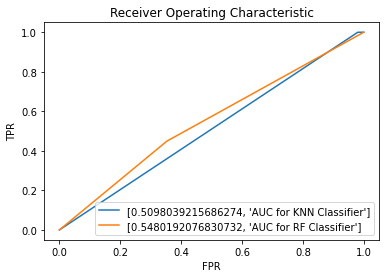

Text(0.5, 1.0, 'Precision Recall Curve')

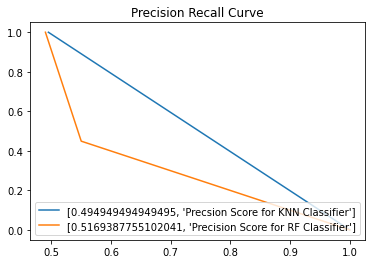

In [27]:
plt.plot(fpr_k, tpr_k, label= "KNN")
plt.plot(fpr_r, tpr_r, label= "Random Forest")
handles=[]
handles.append([auc_k,'AUC for KNN Classifier'])
handles.append([auc_rf,'AUC for RF Classifier'])
plt.legend(handles, loc='lower right')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

plt.plot(precision_knn,recall_knn,label="KNN")
plt.plot(precision_rf,recall_rf,label="Random Forest")
handle=[]
handle.append([aps_knn,'Precsion Score for KNN Classifier'])
handle.append([aps_rf,'Precision Score for RF Classifier'])
plt.legend(handle, loc='lower right')
plt.title('Precision Recall Curve')